In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import scipy.signal as ss
from datetime import datetime

In [2]:
%matplotlib notebook

## Read data
Epoch is changed from datetime to timestamp and centered to the first time.

In [3]:
dd = pd.read_csv('train.csv')
dd.epoch = pd.to_datetime(dd.epoch)
dd.epoch = dd.epoch.apply(datetime.timestamp)
dd.epoch = dd.epoch - np.min(dd.epoch)

## Fourier analysis
To compute the frequency sample we quit samples that are excessively near. After that we use 

In [36]:
idx = 20
dd0 = dd[dd['sat_id']==idx]

time = []
first = True
for i in dd0.index:
    if not first:
        if (dd0.epoch[i]-dd0.epoch[i-1] > 0.01):
            time.append(dd0.epoch[i]-dd0.epoch[i-1])
    else:
        first = False
time = np.array(time)
print("Mean: {}, Std. Deviation: {}".format(np.mean(time), np.std(time)))
fs = np.mean(time)

N = 2**13
DD0x = fft(dd0.x, N)
plt.figure(0)
plt.plot(np.arange(N)/N*fs, abs(DD0x))

Mean: 13792.65722165034, Std. Deviation: 0.0004153608223576846


<IPython.core.display.Javascript object>


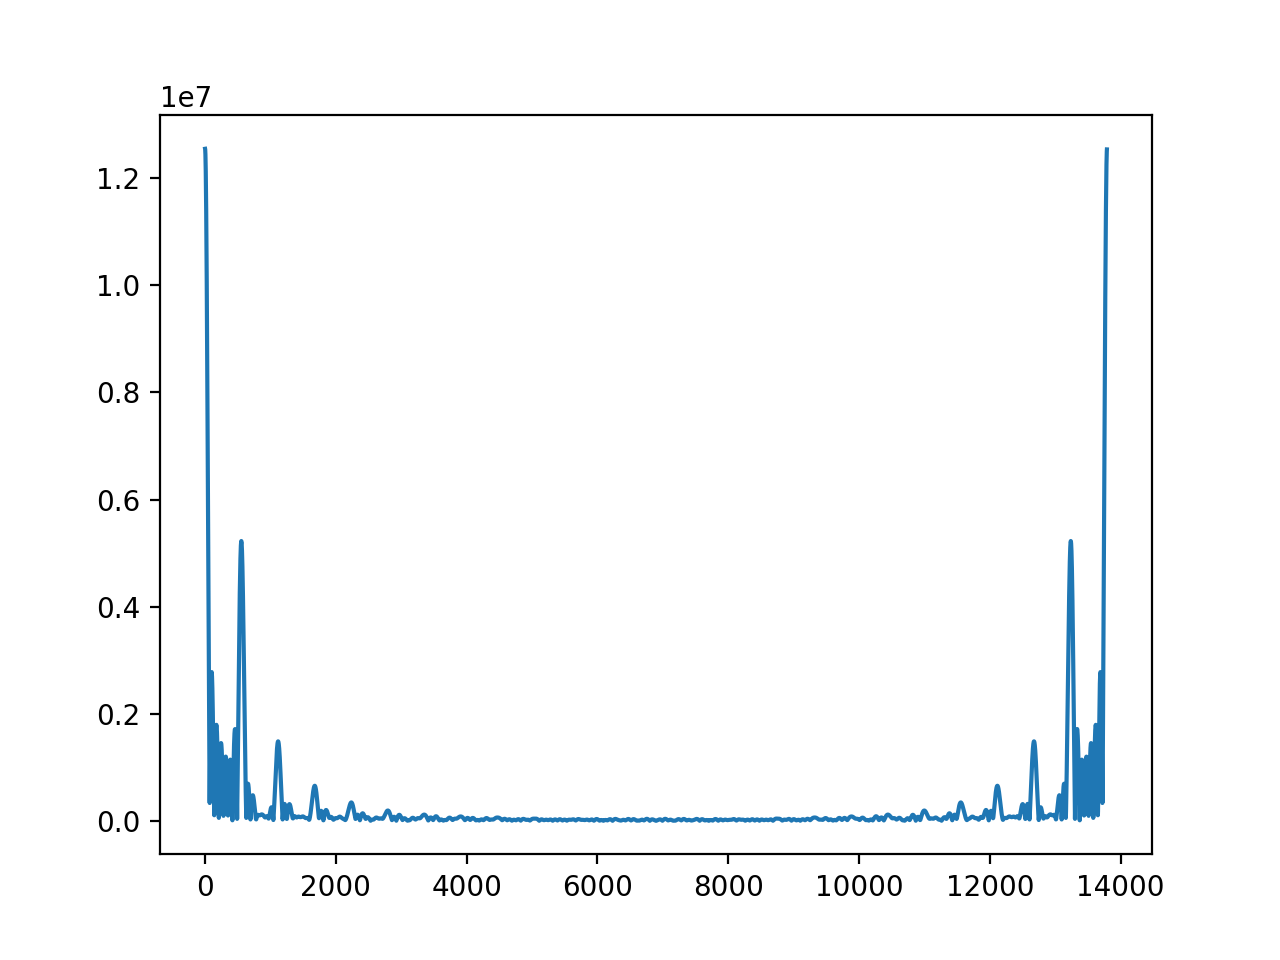